In [1]:
# Code Clause - Artificial Intelligence Internship

# Golden Project :- Task - 1

# Blindness Detection

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
# specifically for cnn
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df['diagnosis'].unique()

array([2, 4, 1, 0, 3], dtype=int64)

In [6]:
train_df["id_code"]=train_df["id_code"].apply(lambda x:x+".png")
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
test_df["id_code"]=test_df["id_code"].apply(lambda x:x+".png")

<AxesSubplot:>

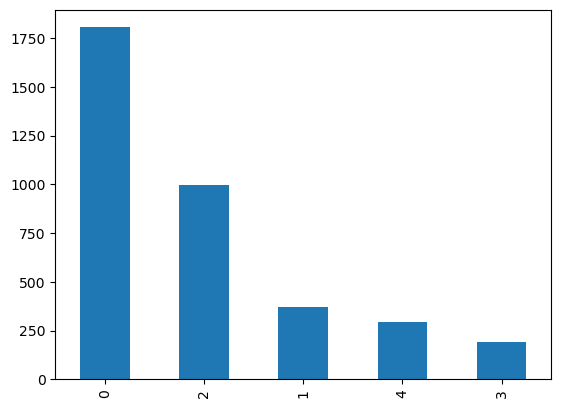

In [7]:
train_df['diagnosis'].value_counts().plot(kind='bar')

In [8]:
nb_classes = 5
lbls = list(map(str, range(nb_classes)))
batch_size = 32
img_size = 150
nb_epochs = 10

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.3
                                  )

In [10]:
training_set = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=lbls,
    target_size=(img_size,img_size),
    subset='training')

test_set = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=lbls,
    target_size=(img_size,img_size),
    subset='validation'
)

Found 2564 validated image filenames belonging to 5 classes.
Found 1098 validated image filenames belonging to 5 classes.


In [11]:
classifier = Sequential()

In [12]:
classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', 
                      input_shape = (img_size,img_size,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

classifier.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

classifier.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [14]:
classifier.add(Flatten())

In [15]:
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'softmax'))

In [16]:
classifier.compile(optimizer = Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics = ['accuracy'])

In [17]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = nb_epochs,
                         validation_data = test_set,
                         validation_steps = 10)

Epoch 1/10
10/10 [==============================] - 66s 7s/step - loss: 1.2346 - accuracy: 0.5171 - val_loss: 1.1775 - val_accuracy: 0.5219
Epoch 2/10
10/10 [==============================] - 60s 7s/step - loss: 1.0943 - accuracy: 0.6473 - val_loss: 0.9624 - val_accuracy: 0.6625
Epoch 3/10
10/10 [==============================] - 61s 6s/step - loss: 0.9457 - accuracy: 0.6500 - val_loss: 0.8186 - val_accuracy: 0.7219
Epoch 4/10
10/10 [==============================] - 61s 6s/step - loss: 0.9080 - accuracy: 0.6719 - val_loss: 0.9808 - val_accuracy: 0.6438
Epoch 5/10
10/10 [==============================] - 58s 6s/step - loss: 0.8320 - accuracy: 0.7031 - val_loss: 0.8845 - val_accuracy: 0.6969
Epoch 6/10
10/10 [==============================] - 60s 6s/step - loss: 0.7516 - accuracy: 0.7281 - val_loss: 0.9651 - val_accuracy: 0.6719
Epoch 7/10
10/10 [==============================] - 62s 6s/step - loss: 0.9000 - accuracy: 0.6781 - val_loss: 0.8805 - val_accuracy: 0.6812
Epoch 8/10
10/10 [==

In [18]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = nb_epochs,
                         validation_data = test_set,
                         validation_steps = 10)

Epoch 1/10
10/10 [==============================] - 60s 6s/step - loss: 0.8754 - accuracy: 0.6812 - val_loss: 0.7879 - val_accuracy: 0.7125
Epoch 2/10
10/10 [==============================] - 59s 6s/step - loss: 0.7682 - accuracy: 0.7125 - val_loss: 0.7053 - val_accuracy: 0.7344
Epoch 3/10
10/10 [==============================] - 61s 6s/step - loss: 0.7707 - accuracy: 0.7219 - val_loss: 0.8294 - val_accuracy: 0.7156
Epoch 4/10
10/10 [==============================] - 61s 6s/step - loss: 0.7728 - accuracy: 0.7063 - val_loss: 0.8410 - val_accuracy: 0.6969
Epoch 5/10
10/10 [==============================] - 59s 6s/step - loss: 0.7622 - accuracy: 0.7188 - val_loss: 0.9031 - val_accuracy: 0.6438
Epoch 6/10
10/10 [==============================] - 62s 6s/step - loss: 0.7461 - accuracy: 0.7156 - val_loss: 0.8641 - val_accuracy: 0.6750
Epoch 7/10
10/10 [==============================] - 63s 7s/step - loss: 0.6747 - accuracy: 0.7500 - val_loss: 0.8691 - val_accuracy: 0.7250
Epoch 8/10
10/10 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


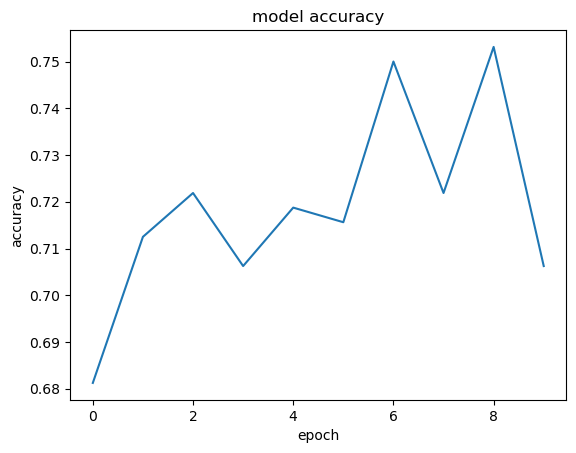

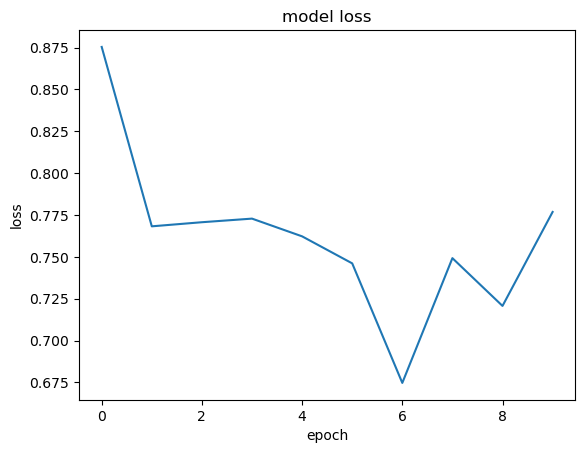

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

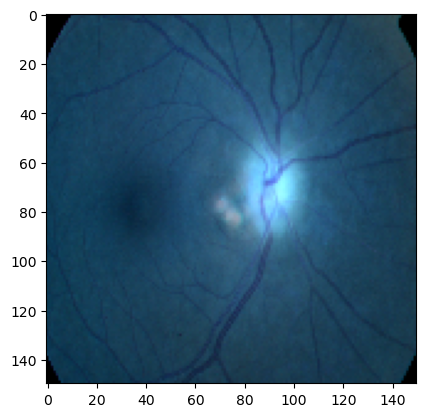

In [21]:
import cv2
import matplotlib.pyplot as plt
test_image = cv2.imread('test_images/3d4d693f7983.png', cv2.IMREAD_COLOR)
test_image = cv2.resize(test_image, (150,150))


plt.imshow(test_image)

In [22]:
test_ids = test_df['id_code']

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(  
        dataframe=test_df,
        directory = "test_images",    
        x_col="id_code",
        target_size = (img_size,img_size),
        batch_size = 1,
        shuffle = False,
        class_mode = None
        )

Found 1928 validated image filenames.


In [24]:
test_generator.reset()
predict=classifier.predict_generator(test_generator, steps = len(test_generator.filenames))

In [25]:
filenames=test_generator.filenames
results=pd.DataFrame({"id_code":filenames,
                      "diagnosis":np.argmax(predict,axis=1)})
results['id_code'] = results['id_code'].map(lambda x: str(x)[:-4])
results.to_csv("Blindness_Detection.csv",index=False)

In [26]:
results.head()

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,2
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2
